# For Parsing XML File

In [ ]:
import patent_parser_v2
df = patent_parser_v2.parse_patents('ipa200409.xml', 'ipa200409_v1')
df.to_csv(output_filename, header = 'True', index = 'False ')
df

In [2]:
df

,Unnamed: 0,juridiction,pub_year,kind,app_year,app_type,prior_year,prior_country,title,assignee,inventors,abstract,claims
0,0,US,2020,A1,2019,utility,2017.0,RU,METHOD FOR CULTIVATING SOWN CROPS AND APPARATU...,NaN,Sergei Vladimirovich BRINDYUK;;,A method for increasing the efficiency of farm...,"in a technological operation, preparing the fi..."
1,1,US,2020,A1,2018,utility,2017.0,FR,HITCH DEVICE FOR AGRICULTURAL VEHICLE,NaN,Hubert DEFRANCQ;;,A hitch device for an implement is capable of ...,a first chassis ( a second chassis ( means ( a...
2,2,US,2020,A1,2019,utility,NaN,NaN,COMPACT ROW CLOSER AND ROW CLEANER ASSEMBLIES,NaN,Ronald Steve Martin;;Travis Harnetiaux;;Asghar...,An apparatus and system for adjustably control...,a frame mounting plate; a set of at least two ...
3,3,US,2020,A1,2018,utility,NaN,NaN,SYSTEM AND RELATED METHODS FOR MONITORING AND ...,CNH Industrial America LLC;;,Ivan Antich;;,"In one aspect, a method is disclosed for adjus...","determining, by the computing device, a target..."
4,4,US,2020,A1,2018,utility,NaN,NaN,SYSTEM AND METHOD FOR CONTROLLING THE SPEED OF...,CNH Industrial America LLC;;,Christopher Schoeny;;Trevor Stanhope;;Darian E...,"In one aspect, a system for controlling the sp...",a furrow closing assembly including at least o...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,5621,US,2020,P1,2019,plant,NaN,NaN,Calla lily plant named 'Peter's Pride',NaN,Peter Beckman;;,‘Peter's Pride’ is a new variety of calla lily...,NaN
5622,5622,US,2020,P1,2019,plant,NaN,NaN,Calla lily plant named 'Diva Himalaya',NaN,Peter Beckman;;,‘Diva Himalaya’ is a new variety of calla lily...,NaN
5623,5623,US,2020,P1,2019,plant,NaN,NaN,Calla Lily plant named 'Diva Alpina',NaN,Peter Beckman;;,‘Diva Alpina’ is a new variety of calla lily p...,NaN
5624,5624,US,2020,P1,2019,plant,NaN,NaN,Calla lily plant named 'Diva Siberia',NaN,Peter Beckman;;,‘Diva Siberia’ is a new variety of calla lily ...,NaN


# Bibliographic Analysis

Top Assignees vs Number of Patents


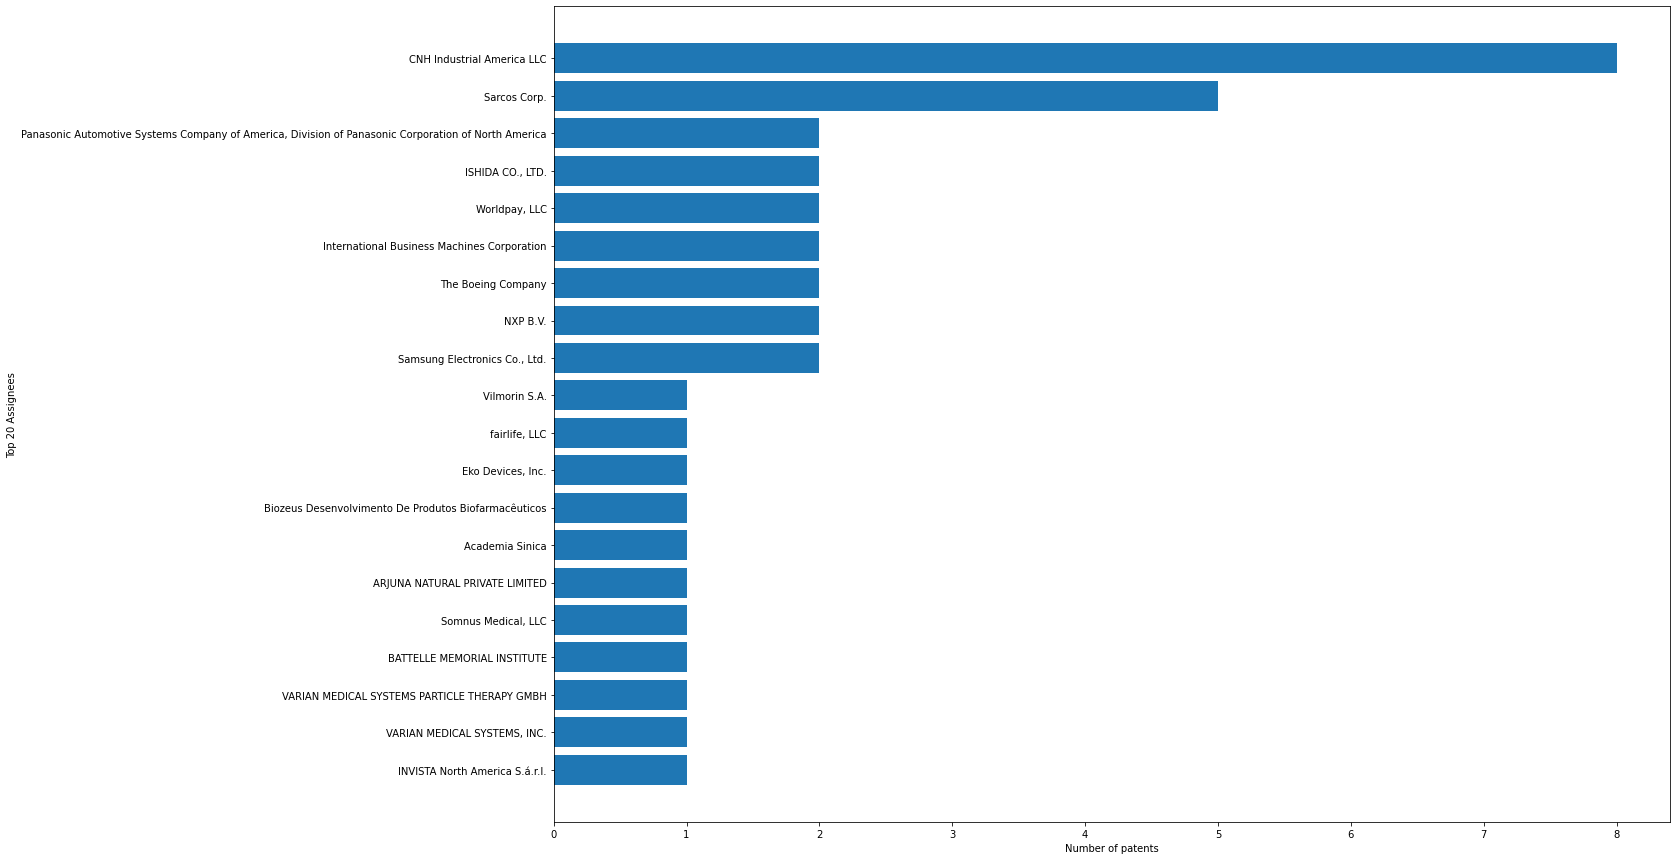

Top Inventors vs Number of Patents


<Figure size 1440x1080 with 0 Axes>

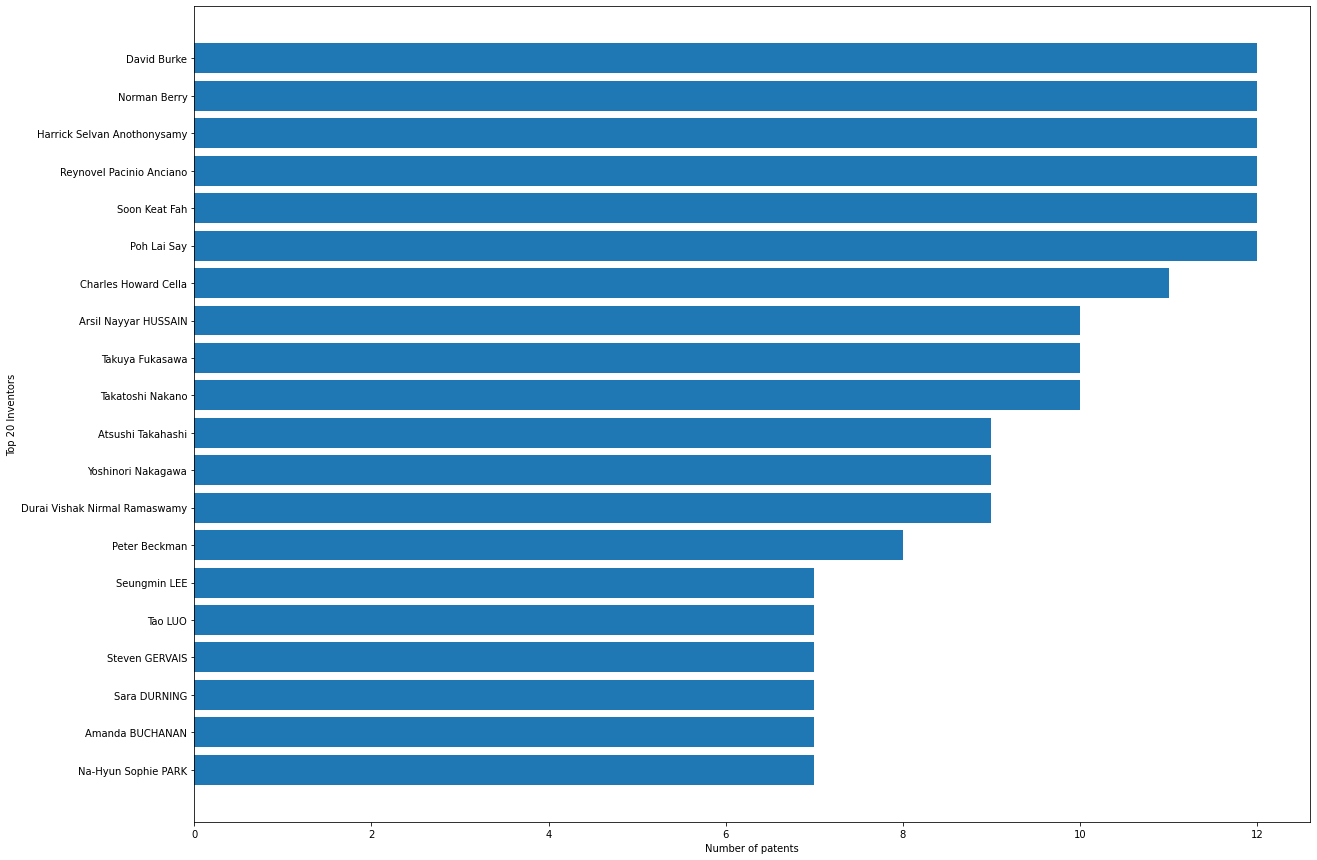

Top Juridictions vs % of Patents


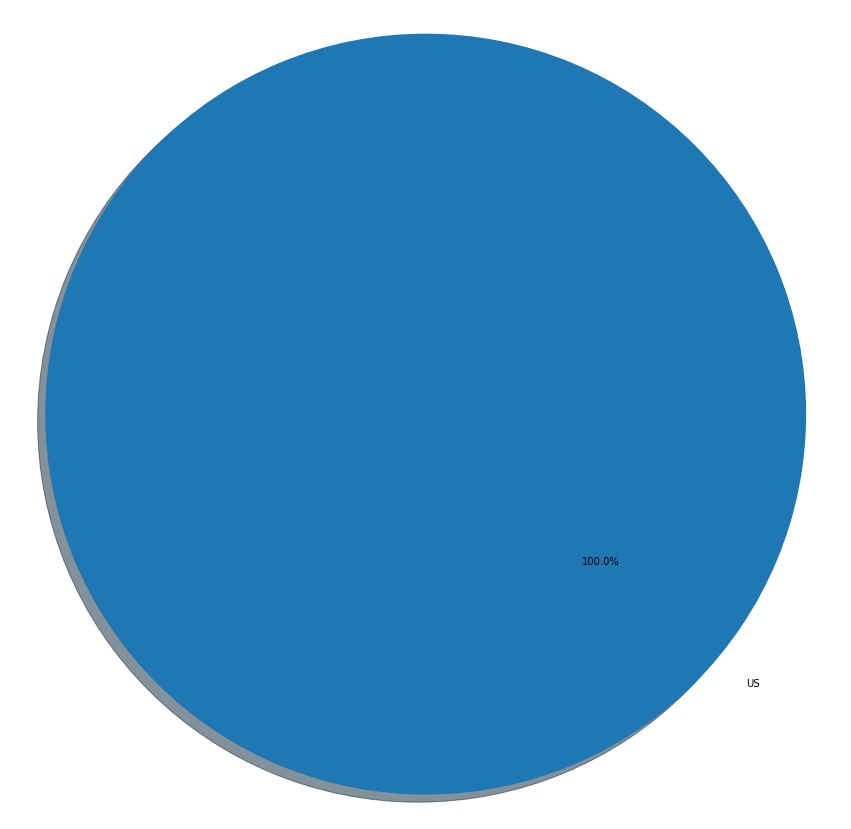

Prior Country vs % of Patents


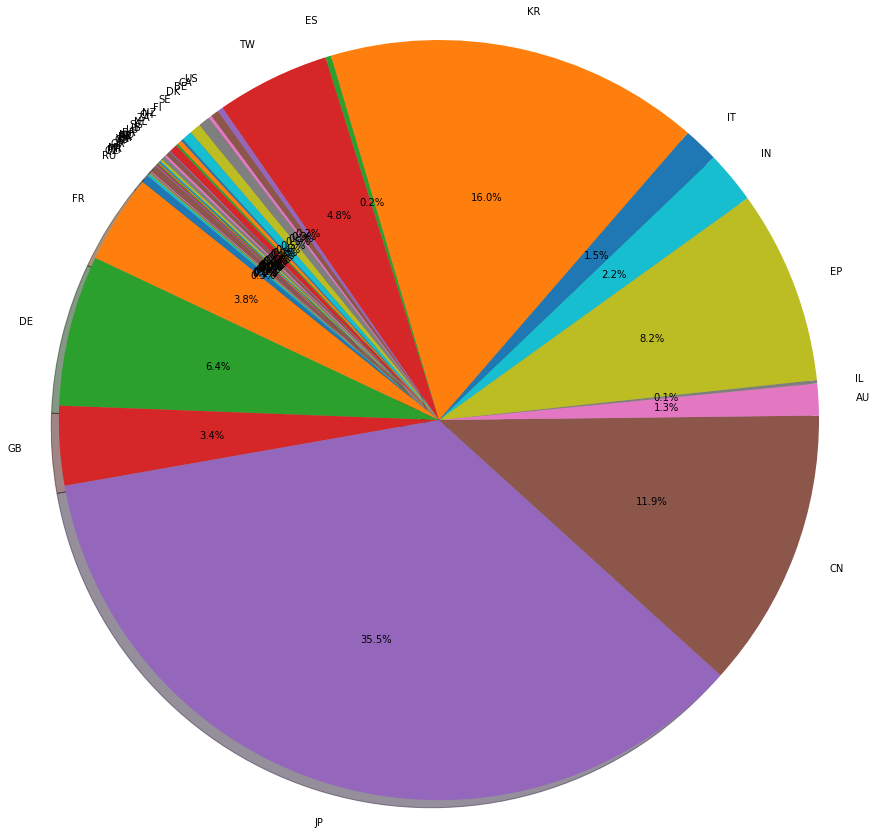

Inventors Network


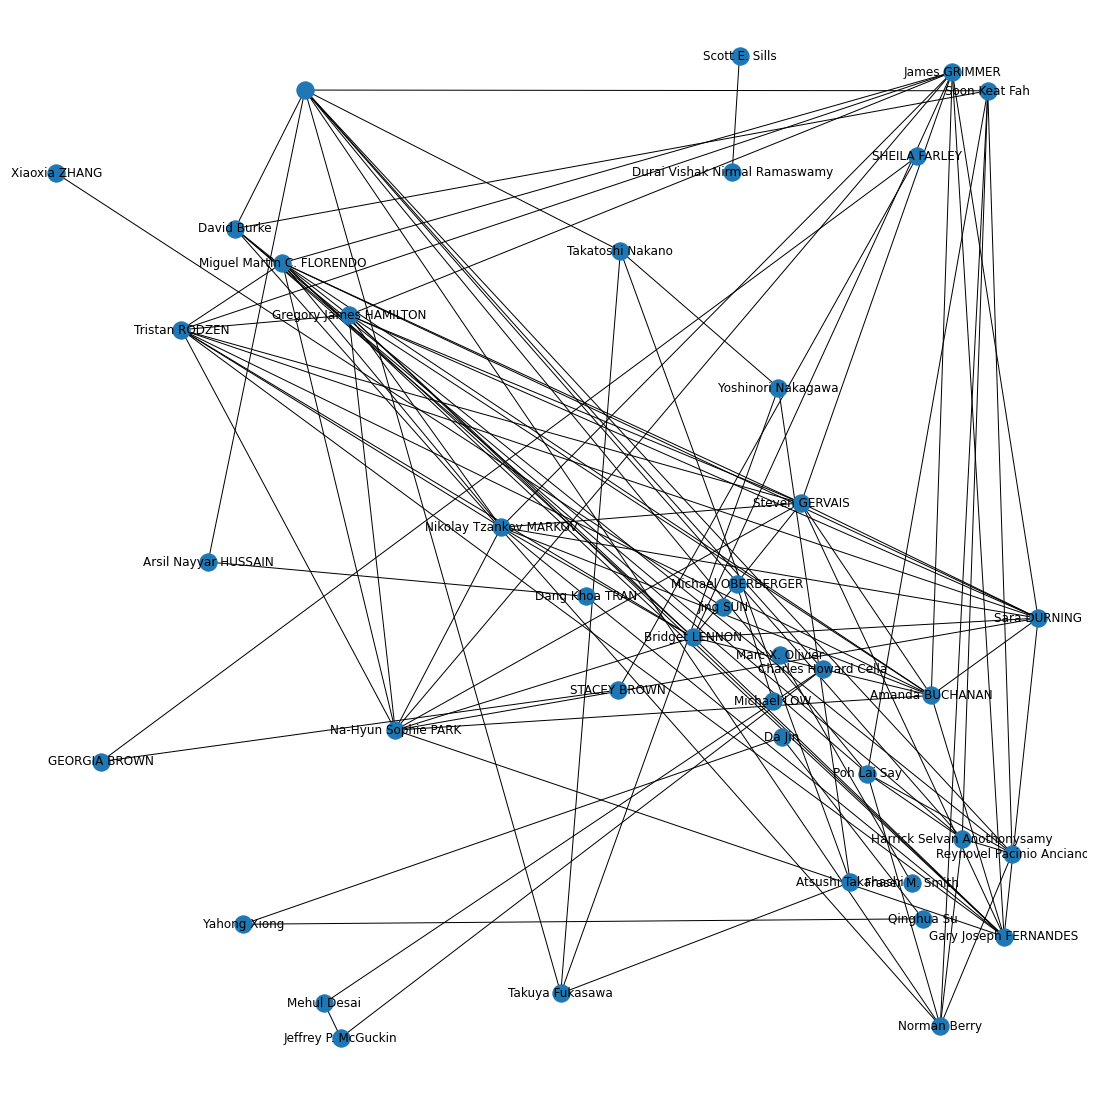

In [1]:
import BibliographicAnalysis_v2 as ba
ba.bibliographic_plots('ipa200409_v1.csv', top_assignees = 20, top_inventors = 20, top_pairs = 100)

# Content Analysis 

In [2]:
import ContentAnalysis_v1 as ca
best_lda_model, bow_corpus, dictionary = ca.topics('ipa200409_v1.csv', claims_abstract = False, min_count_keywords = 20, threshold_keywords = 20, min_topics = 2, max_topics = 10, cpus = 16, topn_words_per_topic = 30, lda_iterations = 100)

100%|██████████| 9/9 [05:16<00:00, 35.20s/it]


In [4]:
import pyLDAvis
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(best_lda_model, bow_corpus, dictionary)

PreparedData(topic_coordinates=             x    y  topics  cluster      Freq
topic                                         
0      0.03201  0.0       1        1  53.87281
1     -0.03201  0.0       2        1  46.12719, topic_info=                        Term        Freq       Total Category  logprob  \
875            semiconductor  120.000000  120.000000  Default  30.0000   
725   information_processing   46.000000   46.000000  Default  29.0000   
151                   sensor   86.000000   86.000000  Default  28.0000   
715                  dynamic   41.000000   41.000000  Default  27.0000   
134                including   78.000000   78.000000  Default  26.0000   
...                      ...         ...         ...      ...      ...   
8                   assembly   43.063168  137.575150   Topic2  -5.7258   
182                  program   30.334267   58.705582   Topic2  -6.0762   
198                detection   33.882980   87.787964   Topic2  -5.9655   
1891                 network   32.624786   90.287155   Topic2  -6.0034   
655                  optical   31.024248   67.838242   Topic2  -6.0537   

      loglift  
875   30.0000  
725   29.0000  
151   28.0000  
715   27.0000  
134   26.0000  
...       ...  
8     -0.3877  
182    0.1135  
198   -0.1782  
1891  -0.2442  
655   -0.0086  

[189 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1214      1  0.874989  absorbent
1214      2  0.109374  absorbent
1537      1  0.802627     active
1537      2  0.200657     active
931       1  0.317631      agent
...     ...       ...        ...
7         2  0.532354    vehicle
989       1  0.859183       vivo
989       2  0.171837       vivo
4339      1  0.227677     wiring
4339      2  0.834816     wiring

[281 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])